In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)

In [4]:
X = np.empty((100,2))
X

array([[0.00000000e+000, 1.09682573e-321],
       [0.00000000e+000, 6.92951003e-310],
       [0.00000000e+000, 0.00000000e+000],
       [            nan, 0.00000000e+000],
       [6.92937726e-310, 0.00000000e+000],
       [4.44659081e-323, 6.92952359e-310],
       [6.92953150e-310,             nan],
       [0.00000000e+000,             nan],
       [0.00000000e+000, 6.92937726e-310],
       [3.55727265e-322, 5.43472210e-323],
       [6.92952359e-310, 6.92953150e-310],
       [4.94065646e-324, 1.38338381e-322],
       [            nan, 0.00000000e+000],
       [6.92937726e-310, 7.11454530e-322],
       [5.43472210e-323, 6.92952359e-310],
       [6.92953150e-310, 0.00000000e+000],
       [1.38338381e-322,             nan],
       [4.94065646e-323, 6.92937726e-310],
       [1.06718180e-321, 3.95252517e-323],
       [6.92952359e-310, 6.92953150e-310],
       [6.92953642e-310, 1.28457068e-322],
       [            nan, 0.00000000e+000],
       [6.92937726e-310, 1.42290906e-321],
       [5.4

In [3]:
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

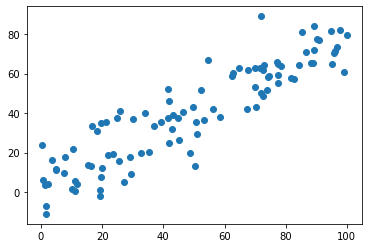

In [4]:
plt.scatter(X[:,0], X[:,1])

# demean

In [5]:
def demean(X):
    return X - np.mean(X, axis=0)

In [6]:
X_demean = demean(X)

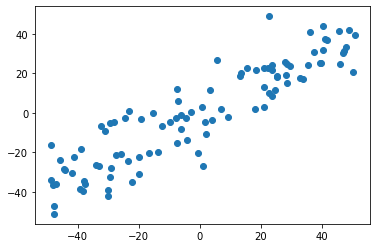

In [7]:
plt.scatter(X_demean[:,0], X_demean[:,1])

## 梯度上升法

In [8]:
def f(w,X):
    return np.sum((X @ w)**2)/len(X)

In [9]:
def df_math(w,X):
    return (X.T @ (X @ w)) * 2 /len(X)

In [10]:
def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X))/ (2 * epsilon)
    return res
    

In [11]:
def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    cur_iter = 0 
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = direction(w + eta * gradient)
        if(abs(f(w,X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [12]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w.T

array([0.32292754, 0.87410072])

In [13]:
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据

In [14]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77660882, 0.62998313])

In [15]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.77660882, 0.62998313])

In [16]:
%%time
w = gradient_ascent(df_math, X_demean, initial_w, eta)
w

CPU times: user 537 µs, sys: 59 µs, total: 596 µs
Wall time: 545 µs


array([0.77660882, 0.62998313])

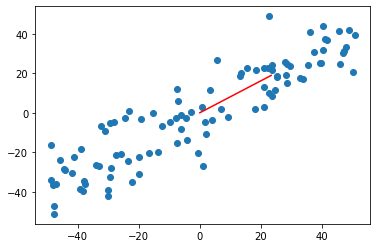

In [17]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

# 使用极端数据集测试

In [18]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

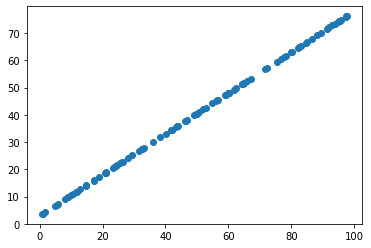

In [19]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()


In [20]:
X2_demean = demean(X2)

In [25]:
%%time
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
w2

CPU times: user 519 µs, sys: 62 µs, total: 581 µs
Wall time: 551 µs


array([0.79999984, 0.60000022])

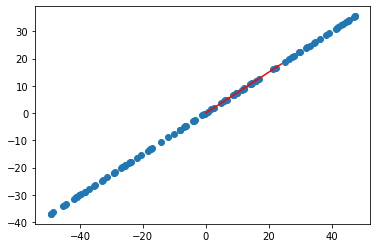

In [22]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

# 随机梯度上升法

In [32]:
np.random.permutation(len(X))

array([76, 45,  0, 44, 47, 62, 61, 13,  9, 15,  5, 10, 41, 53, 85, 81, 88,
       49, 80, 93, 60, 58, 20, 95, 83, 94, 68,  1,  4,  7, 27, 24, 65, 31,
       97, 86, 67, 34, 17, 22, 89, 64, 74, 23, 56, 98, 37, 36, 57, 30, 90,
       33, 39, 32, 75, 92, 26, 66, 51, 55, 46, 12, 73, 79, 11, 29, 19, 35,
        3, 77, 52, 69, 40, 96, 21, 43,  2, 72, 87, 82, 14, 91, 84, 48, 63,
       50,  6, 16, 99, 28,  8, 70, 38, 71, 25, 59, 78, 18, 54, 42])

In [33]:
def dJ_sgd(w, X_i):
    return (X_i.T * (X_i @ w)) * 2 /len(X)

def sgd(X, initial_w, n_iters):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    
    w = direction(initial_w)
    for cur_iter in range(n_iters):
        indexes = np.random.permutation(len(X))
        X_new = X[indexes]
        for i in range(len(X)):
            gradient = dJ_sgd(w, X_new[i])
            w = w + learning_rate(cur_iter*len(X) + i) * gradient
            w = direction(w)
    return w

In [34]:
%%time
initial_w = np.random.random(X.shape[1])  # 不能取0
initial_w
sgd(X_demean,initial_w,5)

CPU times: user 7.56 ms, sys: 2.21 ms, total: 9.77 ms
Wall time: 7.78 ms


array([0.79102149, 0.61178836])